In [86]:
"""
随机森林进行回归。
"""

'\n随机森林进行回归。\n'

In [87]:
import numpy as np
import pandas as pd
train_input_txt = pd.read_table('train_input.txt',header = None)
output_txt = pd.read_table('output.txt',header = None)
train_input=np.loadtxt('train_input.txt',dtype=np.float32)
output=np.loadtxt('output.txt',dtype=np.float32)
data_train=pd.DataFrame(train_input)
data_output=pd.DataFrame(output)
data_train.describe()
data_output.describe()
data_train.columns=['A','B','C','D','E','F','G']
data_output.columns = ['Y']

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_11992/3909339365.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF1 = random_forest_regressor.fit(X_train, Y_train)


0.022508662283803414


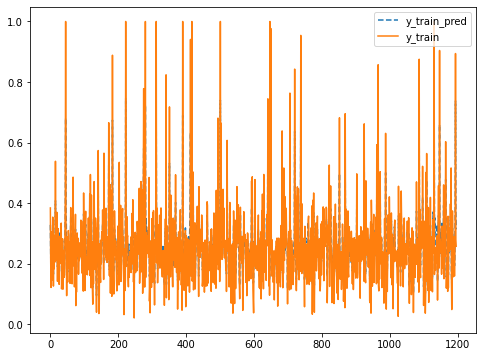

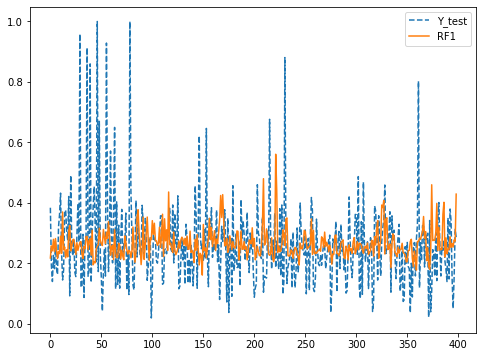

In [93]:
"""
    交叉验证的划分
"""
"""
from sklearn.model_selection import train_test_split
#data_train(全部数据) output(全部目标值)
#X_train训练集(全部特征) Y_train训练集的目标值
#test同理。
X_train, X_test, Y_train, Y_test = train_test_split(data_train,output, test_size=0.25, random_state=1) #这里训练集75%:测试集25%
import numpy as np
from sklearn import ensemble
from matplotlib import pyplot as plt
random_forest_regressor = ensemble.RandomForestRegressor(n_estimators=100,criterion="squared_error")
X_train = X_train.sort_index()
Y_train = pd.DataFrame(Y_train)
Y_train = Y_train.sort_index()
# 这里进行训练集的排序
RF1 = random_forest_regressor.fit(X_train, Y_train)
# 拟合
X_test = X_test.sort_index()
Y_test = pd.DataFrame(Y_test)
Y_test = Y_test.sort_index()
# 测试集进行排序
y_train_pred = RF1.predict(X_train)
y_pred = RF1.predict(X_test)
Y_test = np.array(Y_test)
# 拟合与排序
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test,y_pred))

from matplotlib import pyplot as plt

from matplotlib import pyplot as plt
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(y_train_pred, '--', label='y_train_pred')
ax1.plot(Y_train, '-',label='y_train')
ax1.legend(loc='best')

fig2, ax2 = plt.subplots(figsize=(8,6))
ax2.plot(Y_test, '--', label='Y_test')
ax2.plot(y_pred, '-',label='RF1')
ax2.legend(loc='best')
"""

In [ ]:
import numpy as np
from sklearn import ensemble
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
x = data_train[['A','B','C','D','E','F','G']]
y = data_output[['Y']]
# x=sm.add_constant(x)
random_forest_regressor = ensemble.RandomForestRegressor(n_estimators=100,criterion="squared_error")
RF = random_forest_regressor.fit(x, y)
y_fitted = RF.predict(x)
scores = cross_val_score(RF,x,y)
scores.mean()

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data_output, '--', label='data')
ax.plot(y_fitted, '-',label='RF')
ax.legend(loc='best')

In [ ]:
test_input_txt = pd.read_table('test_input.txt',header = None)
test_input=np.loadtxt('test_input.txt',dtype=np.float32)
data_test=pd.DataFrame(test_input)
data_test.describe()

In [ ]:
data_test.columns=['A','B','C','D','E','F','G']
xx = data_test[['A','B','C','D','E','F','G']]
# xx=sm.add_constant(xx)
from matplotlib import pyplot as plt
y_test = RF.predict(xx)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y_test, '-',label='RFPreD')
ax.legend(loc='best')

In [ ]:
# y_test.to_excel("test_pls.xlsx")
y_test = pd.DataFrame(y_test)
y_test.index = np.linspace(1,798,798)
y_test.to_csv("test_RF.csv")